In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
import kagglehub
import pandas as pd
import os

url = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

for filename in os.listdir(url):
    if filename.endswith(".csv"):
        filepath = os.path.join(url, filename)
        data = pd.read_csv(filepath)
        break

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(data.isnull().sum())

X = data.drop('Outcome', axis=1)
y = data['Outcome']

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy:.2f}')


Accuracy for k=1: 0.69
Accuracy for k=2: 0.73
Accuracy for k=3: 0.68
Accuracy for k=4: 0.72
Accuracy for k=5: 0.69
Accuracy for k=6: 0.70
Accuracy for k=7: 0.69
Accuracy for k=8: 0.71
Accuracy for k=9: 0.70
Accuracy for k=10: 0.72


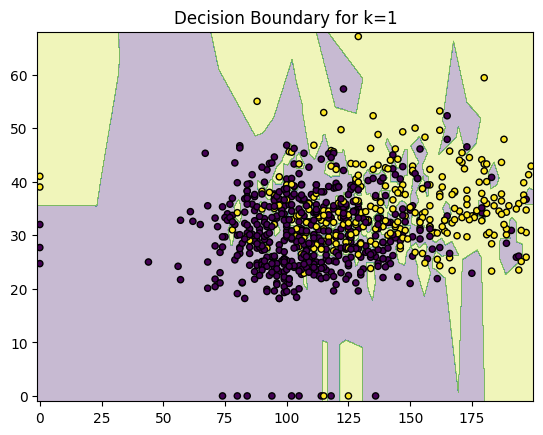

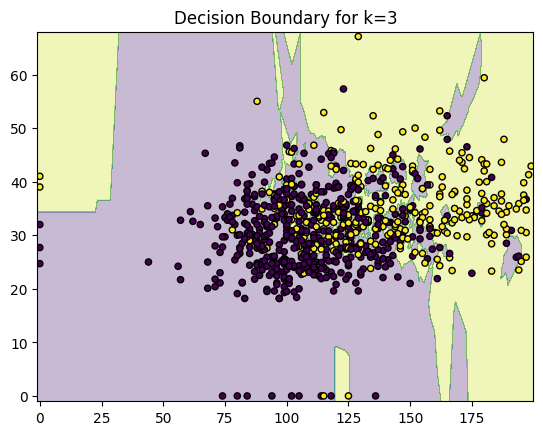

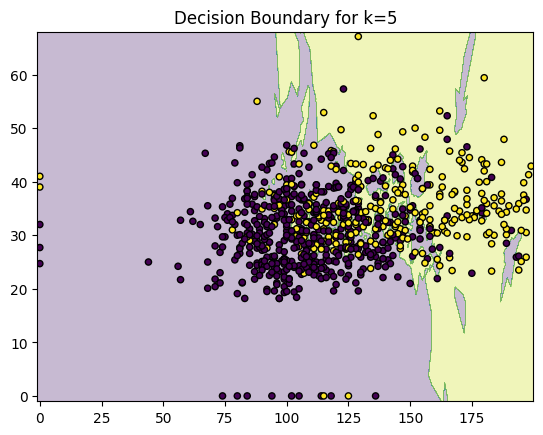

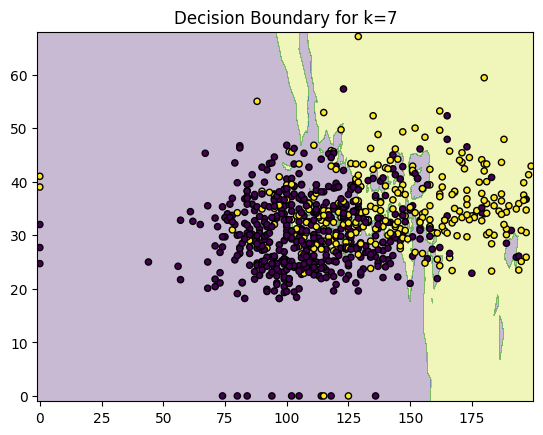

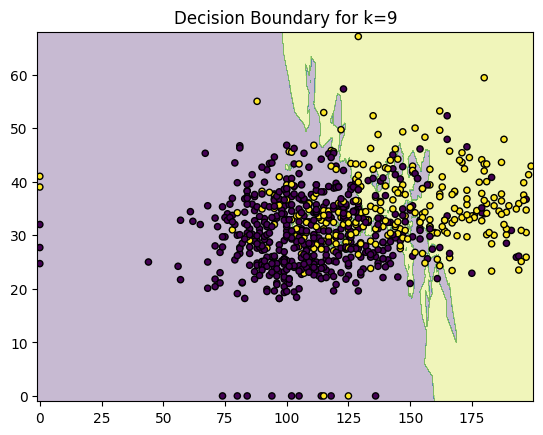

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f'Decision Boundary for k={k}')
    plt.show()

X_reduced = data[['Glucose', 'BMI']].values
y_reduced = data['Outcome'].values

for k in [1, 3, 5, 7, 9]:
    plot_decision_boundary(X_reduced, y_reduced, k)



---



In [ ]:
for random_state in [0, 42, 100, 200]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with random_state={random_state}: {accuracy:.2f}')

Accuracy with random_state=0: 0.75
Accuracy with random_state=42: 0.69
Accuracy with random_state=100: 0.74
Accuracy with random_state=200: 0.73
